<a href="https://colab.research.google.com/github/MikeyClausen/Prediction-of-Product-Sales/blob/main/p1p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlet Store Sales Predictions
##Import Data

In [1]:
#DF, Pandas, Numpy

df_sales = '/content/drive/MyDrive/DOJO/Stack 1/IMPORTS/sales_predictions.xlsx'
import pandas as pd
import numpy as np
df = pd.read_excel(df_sales)

##Loading Data

In [2]:
#View Columns
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

##How many rows and columns?



In [4]:
#Display info for Rows and Columns
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##What are the datatypes of each variable?



In [5]:
#Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##Are there duplicates? If so, drop any duplicates.

In [6]:
# Any Duplicates?
df.duplicated().sum()

0

##Identify missing values.

In [7]:
#Missing values list.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.shape

(8523, 12)

##Decide on how to address the missing values.
##**Item_Weight Missing Values**
###Justification
####We will use mean to impute the following data. It should closely represnt accurate info here.

In [9]:
#Now we will replace any blank fields with our mean.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

##**Outlet_Size Missing Values**
###Justification
####We will use mode here to impute data. This will average over the data and fill info as needed. Based on Outlet_Size



In [10]:
#Use mode because categorical data.
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df['Outlet_Size'].replace('High','Large',inplace=True)

#Confirm that there are no missing values after addressing them.

In [11]:
#Checking missing values are replaced.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Find and fix any inconsistent categories of data

In [12]:
#Use .value_counts() to find issues.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
#Use replace to fix typos and clean up data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [14]:
#Check if changes made.
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each

In [15]:
#Use df.describe()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



#####Histogram to view the distributions of various features in your dataset.
#####Boxplot to view statistical summaries of various features in your dataset.
#####Heatmap of the correlation between features.

In [16]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Display data for ease of access.
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


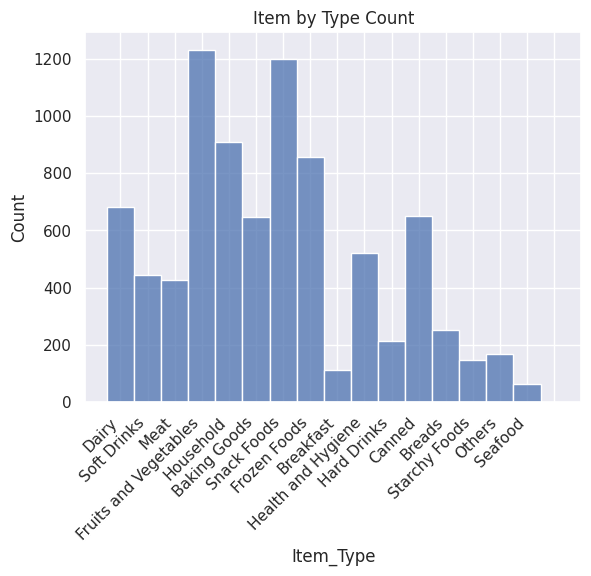

In [18]:
#Histogram 1.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Type'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item by Type Count');

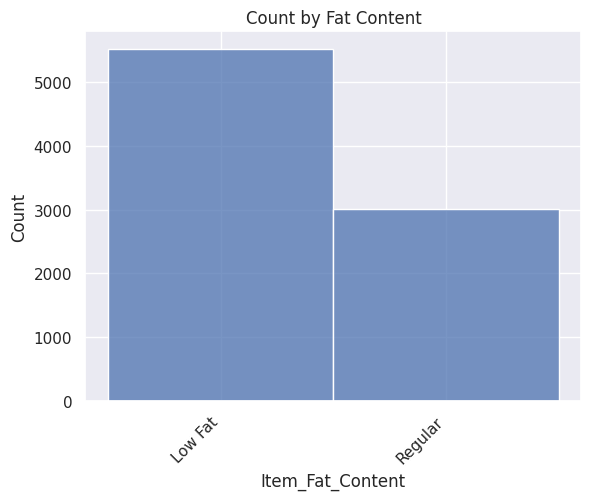

In [19]:
#Histogram 2.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Fat_Content'])
ax.set_xticks([0,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Count by Fat Content');

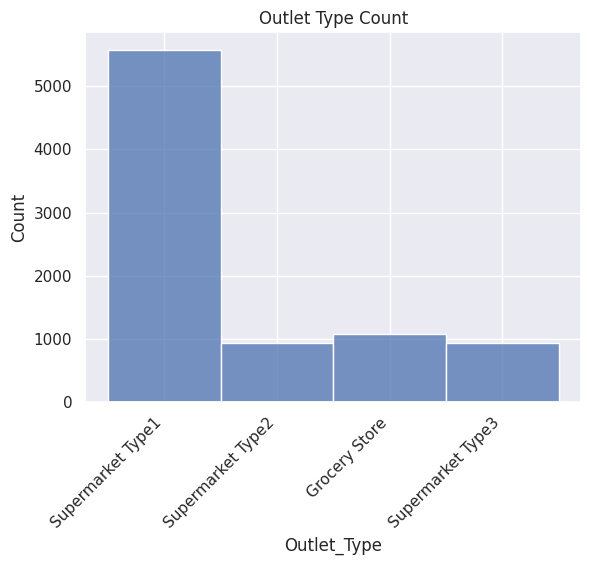

In [20]:
#Histogram 3.
sns.set(style='darkgrid')
ax=sns.histplot(df['Outlet_Type'])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Outlet Type Count');

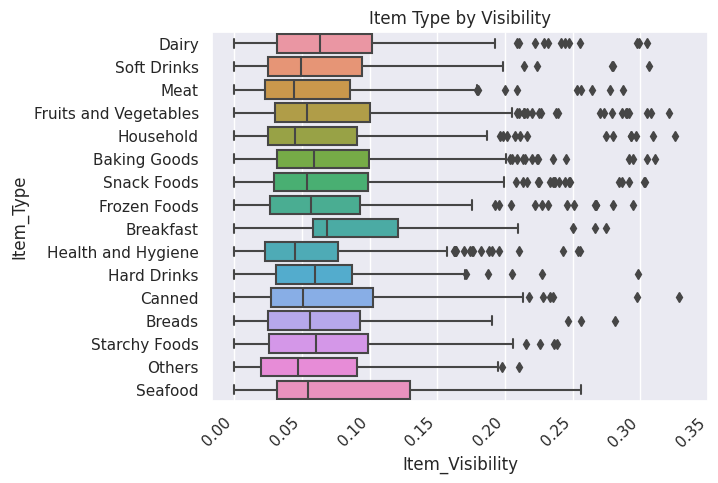

In [21]:
#Boxplot 1.
sns.set(style='darkgrid')
plt.tight_layout()
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Visibility'])
ax.set_xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item Type by Visibility');

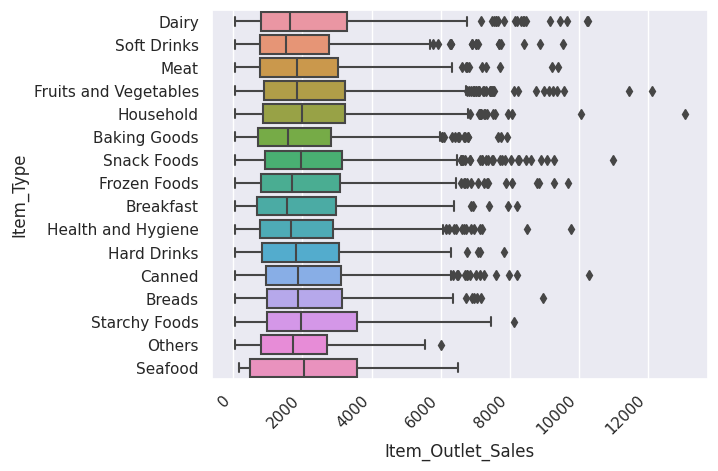

In [22]:
#Boxplot 2.
sns.set(style='darkgrid')
plt.tight_layout()
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Outlet_Sales'])
ax.set_xticks([0,2000,4000,6000,8000,10000,12000])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

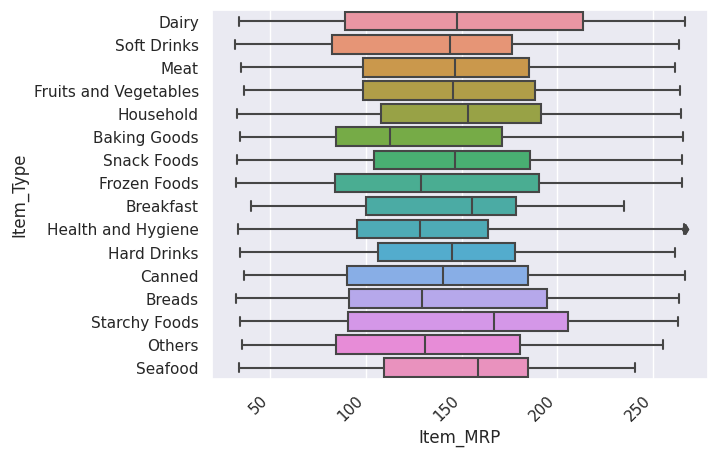

In [23]:
#Boxplot 3.
sns.set(style='darkgrid')
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_MRP'])
ax.set_xticks([50,100,150,200,250])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

In [24]:
#Correlate
corr=df.corr();
corr

<ipython-input-24-b753afad2275>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr();


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


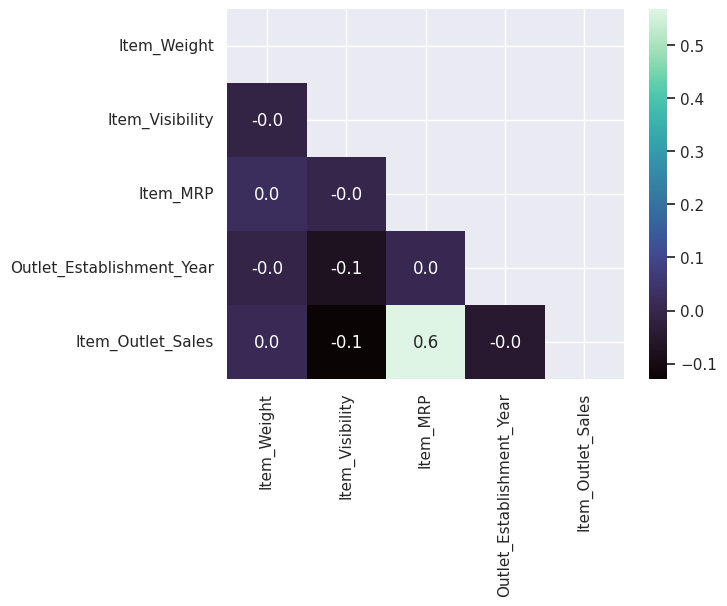

In [25]:
#Define fig and ax objects
plt.tight_layout()
#Creating our heatmap with some args to display in an easy to read manner.
mask=np.triu(np.ones_like(corr))
ax=sns.heatmap(corr,cmap='mako',annot=True,fmt = '.1f',mask=mask);

In [26]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#Possible Questions to Answer:

1.   What outlet type sells the most?
2.   What item type has the highest sales?



##This visualization shows that Supermarket Type3 has the highest mean of sales.

In [27]:
#Groupby and calculate mean of Sales.
salesbytype=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index(name='Mean Sales')
salesbytype.head()

,Outlet_Type,Mean Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


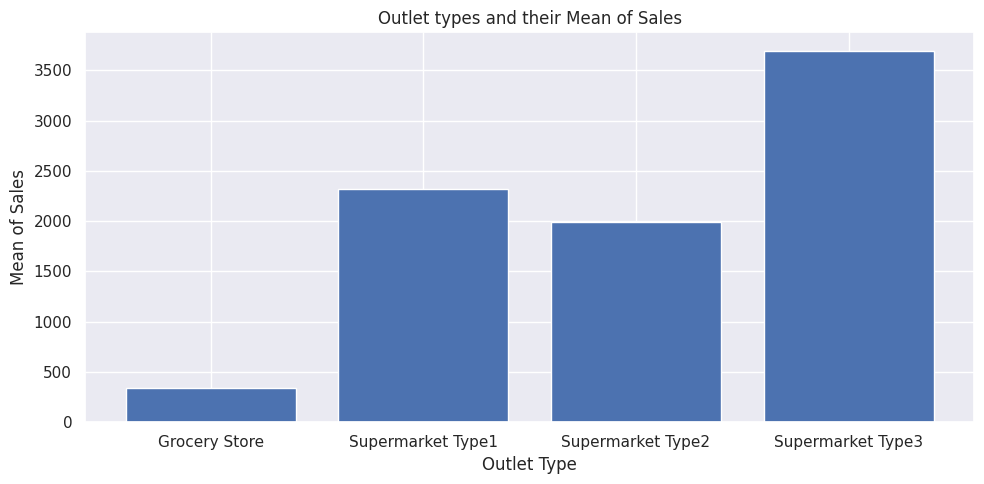

In [28]:
#Simple Barplot
plt.figure(figsize = (10,5))
plt.bar(salesbytype['Outlet_Type'],salesbytype['Mean Sales'])
plt.xlabel('Outlet Type')
plt.ylabel('Mean of Sales')
plt.title('Outlet types and their Mean of Sales')
plt.tight_layout()

##Below shows us that Starchy foods have the highest average sales.

In [29]:
#Using mean of sales, to determine the highest average sales. The filter below will help with this.
itemtyp=df.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name='Mean_Sales')
itemtyp.head()
orderpl2 = itemtyp.sort_values(by='Mean_Sales',ascending=False).Item_Type.values

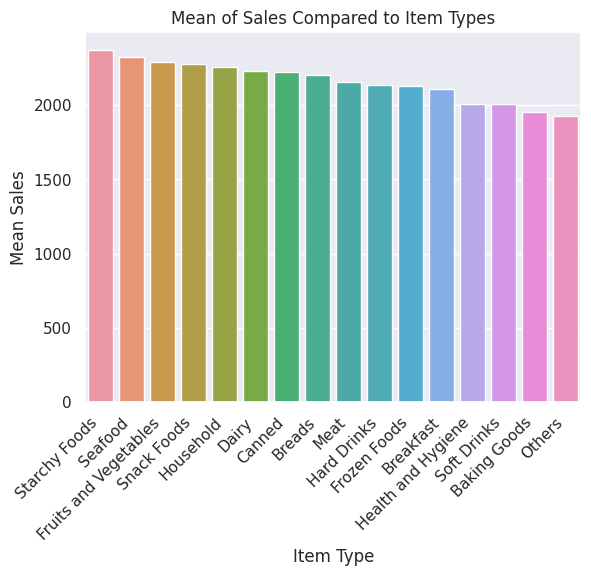

In [30]:
#Another Barplot.
orderpl2 = itemtyp.sort_values(by='Mean_Sales',ascending=False).Item_Type.values
ax=sns.barplot(x='Item_Type',y='Mean_Sales',data=itemtyp,order=orderpl2)
ax.set_xlabel('Item Type')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean of Sales Compared to Item Types')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

#Pre-Processing for machine learning.

In [31]:
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
dfmachine='/content/drive/MyDrive/DOJO/Stack 1/IMPORTS/sales_predictions.xlsx'
df2 = pd.read_excel(dfmachine)

In [33]:
#Fixing missing/typos.
df2['Outlet_Size'].replace('High','Large',inplace=True)
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [34]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [35]:
#Dropping columns that are unnecessary.
df2.drop(columns=['Item_Identifier'],inplace=True);

In [36]:
# Split X should only include the Manufacturer, cereal type, grams of fat, grams of sugars, and weight in ounces columns.
X=df2.drop(['Item_Outlet_Sales'],axis=1)
y=df2['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [38]:
#Column Selectors
cat_selector=make_column_selector(dtype_include='object')
num_selector=make_column_selector(dtype_include='number')

In [39]:
#Imputers,Scaler,Onehotencoder
freq_imputer=SimpleImputer(strategy='most_frequent')
mean_imputer=SimpleImputer(strategy='mean')
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [40]:
#Num Pipeline
numeric_pipe=make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [41]:
#Cat Pipeline
categorical_pipe=make_pipeline(ohe,freq_imputer)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent'))])

In [42]:
#Tuples for the column selectors
number_tuple=(numeric_pipe, num_selector)
category_tuple=(categorical_pipe, cat_selector)
#Column transformer
preprocessor=make_column_transformer(number_tuple,category_tuple,remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])

In [43]:
# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),
                                 columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(preprocessor.transform(X_test),
                                 columns=preprocessor.get_feature_names_out())
# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed.head(2))
X_train_processed.info()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Size_nan,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
0,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pipeline-1__Item_Weight                      6392 non-null   float64
 1   pipeline-1__Item_Visibility                  6392 non-null   float64
 2   pipeline-1__Item_MRP                         6392 non-null   float64
 3   pipeline-1__Outlet_Establishment_Year        6392 non-null   float64
 4   pipeline-2__Item_Fat_Content_Low Fat         6392 non-null   float64
 5   pipeline-2__Item_Fat_Content_Regular         6392 non-null   float64
 6   pipeline-2__Item_Type_Baking Goods           6392 non-null   float64
 7   pipeline-2__Item_Type_Breads                 6392 non-null   float64
 8   pipeline-2__Item_Type_Breakfast              6392 non-null   float64
 9   pipeline-2__Item_Type_Canned                 6392 non-null   float64
 10  

In [44]:
#Create a method to evalute with.
def eval_regression(y_true, y_pred, name='Model'):
  mae=mean_absolute_error(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

#Baseline Model

In [45]:
#Instance the model
dummy=DummyRegressor(strategy='mean')
#Create a pipeline for the model
dummypipe=make_pipeline(preprocessor,dummy)
#Fit the model
dummypipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])),
                ('dummyregressor', DummyRegressor())])

In [46]:
#Predictions and outcomes.
dummytrain_pred=dummypipe.predict(X_train)
dummytest_pred=dummypipe.predict(X_test)
eval_regression(y_train,dummytrain_pred,name='Baseline Regresssion Train')
eval_regression(y_test,dummytest_pred,name='Baseline Regression Test')

Baseline Regresssion Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Baseline Regression Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



#Linear Regression Model

In [47]:
#Make and Fit linear regression pipeline.
reg=LinearRegression()
regpipe=make_pipeline(preprocessor,reg)
regpipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])),
                ('linearregression', LinearRegression())])

In [48]:
#Predictions and outcomes.
linear_train_pred=regpipe.predict(X_train)
linear_test_pred=regpipe.predict(X_test)
eval_regression(y_train,linear_train_pred,name='Linear Regresssion Train')
eval_regression(y_test,linear_test_pred,name='Linear Regression Test')

Linear Regresssion Train Scores
MAE: 847.1217 
MSE: 1,297,555.4596 
RMSE: 1,139.1029 
R2: 0.5616

Linear Regression Test Scores
MAE: 804.1430 
MSE: 1,194,371.4977 
RMSE: 1,092.8730 
R2: 0.5671



#Linear Regression Model Observations


*   This model Performs fairly well on both the testing, and training set.
*   We will check to see if anything performs better.



#Random Forest

In [49]:
#Model Instance
rf=RandomForestRegressor(random_state=42)
#Pipe
rfpipe=make_pipeline(preprocessor,rf)
#Fit it
rfpipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [50]:
#Predict and evalute
rftrainpreds=rfpipe.predict(X_train)
rftestpreds=rfpipe.predict(X_test)

eval_regression(y_train,rftrainpreds,name='Random Forest Train')
eval_regression(y_test,rftestpreds,name='Random Forest Test')

Random Forest Train Scores
MAE: 296.5487 
MSE: 182,932.2485 
RMSE: 427.7058 
R2: 0.9382

Random Forest Test Scores
MAE: 766.6253 
MSE: 1,217,201.2893 
RMSE: 1,103.2685 
R2: 0.5588



#Untuned Random Forest Regressor

*   This model performs very well on the training set. But very poorly on the testing set.
*   This model is overfit and requires tuning.



In [51]:
#Create a range for depths to try. Create a new data set to store the Random Forest Regressor results in.
depths=range(1,20)
scoresrf=pd.DataFrame(index=depths,columns=['Test Score'])
#Loop over the values and make models.
for depth in depths:
  rfuntuned=RandomForestRegressor(max_depth=depth)
  rfuntuned_pipe=make_pipeline(preprocessor,rfuntuned)
  rfuntuned_pipe.fit(X_train,y_train)
  trainrf=rfuntuned_pipe.score(X_train, y_train)
  testrf=rfuntuned_pipe.score(X_test, y_test)
  scoresrf.loc[depth,'Train Score']=trainrf
  scoresrf.loc[depth,'Test Score']= testrf
  scoresrf.head()

In [52]:
#Sort the scores of the model to find the best Depth.
sortscoresrf=scoresrf.sort_values(by='Test Score',ascending=False)
sortscoresrf.head()

,Test Score,Train Score
5,0.602171,0.610220
6,0.601788,0.624289
7,0.59966,0.643583
4,0.597094,0.596594
8,0.594677,0.665178


In [53]:
#Use best depth to Revaulate the Random Forest Regressor Model
bestrf=RandomForestRegressor(random_state=42,max_depth=5)
bestrf_pipe=make_pipeline(preprocessor,bestrf)
bestrf_pipe.fit(X_train,y_train)
print('Training scores for Random Forest Regressor')
eval_regression(y_train,bestrf_pipe.predict(X_train))
print('Testing scores for Random Forest Regressor')
eval_regression(y_test,bestrf_pipe.predict(X_test))

Training scores for Random Forest Regressor
Model Scores
MAE: 755.3818 
MSE: 1,152,588.6796 
RMSE: 1,073.5868 
R2: 0.6105

Testing scores for Random Forest Regressor
Model Scores
MAE: 728.3901 
MSE: 1,096,396.4989 
RMSE: 1,047.0895 
R2: 0.6026



#Tuned Random Forest Regressor Model Observations


*   This model Performs well on both the testing and training sets.
*   This model does perform slowly, but its results are far greater than others.
*   For the R^2 score 60% of the variance is explained.
*   For the MAE testing score is off by about $728.39.


#Decision Tree

In [54]:
#Decision Tree Regressor
dectree=DecisionTreeRegressor(random_state=42)

In [55]:
#Decision Tree Pipe
dectreepipe=make_pipeline(preprocessor,dectree)
dectreepipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [56]:
#Predict and evalute
trainpred=dectreepipe.predict(X_train)
testpred=dectreepipe.predict(X_test)

eval_regression(y_train,trainpred,name='Decision Tree Train')
eval_regression(y_test,testpred,name='Decision Tree Test')

Decision Tree Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Decision Tree Test Scores
MAE: 1,031.6107 
MSE: 2,191,297.1557 
RMSE: 1,480.3031 
R2: 0.2058



#Untuned Decision Tree Regressor


*   This model perofrmn great on the training data.
*   This model performs poorly on the testing data.
*   This model is overfit and needs to be tuned to determine its viability



In [57]:
#Create a range of max_depths
depths=range(1, dectreepipe['decisiontreeregressor'].get_depth())
#Create a data frame to store new data.
scoresdct=pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
#Loop over the values, create new model, pipeline the model, fit it, predict on its arrays, evalute, and store scores.
for depth in depths:
    tree=DecisionTreeRegressor(max_depth=depth,random_state=42)
    tree_pipe=make_pipeline(preprocessor,tree)
    tree_pipe.fit(X_train,y_train)
    trainscoredct=tree_pipe.score(X_train, y_train)
    testscoredct=tree_pipe.score(X_test, y_test)
    scoresdct.loc[depth,'Train Score']=trainscoredct
    scoresdct.loc[depth,'Test Score']=testscoredct

In [58]:
#Sort the scores of the model to find the best Depth.
sortedscoresdct=scoresdct.sort_values(by='Test Score',ascending=False)
sortedscoresdct.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.576426,0.626843
8,0.560455,0.643832


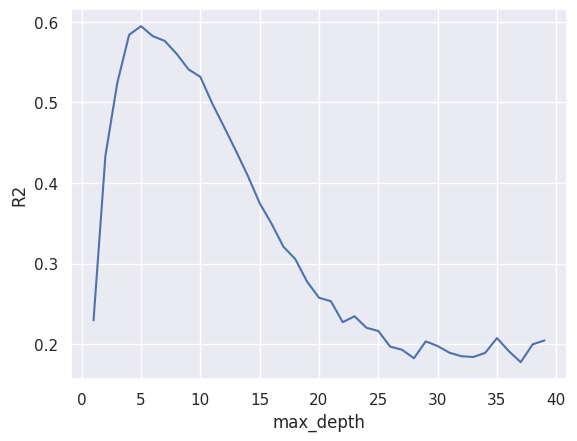

In [60]:
plt.plot(depths,scoresdct['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [61]:
#Get the best depth value from the stored scores.
bestdepth=scoresdct.sort_values(by='Test Score',ascending=False).index[0]
bestdepth

5

In [62]:
#Use best depth to Revaulate the Decision Tree Regressor Model
besttree=DecisionTreeRegressor(random_state=42,max_depth=bestdepth)
besttree_pipe=make_pipeline(preprocessor,besttree)
besttree_pipe.fit(X_train,y_train)
print('Training scores for Decision Tree')
eval_regression(y_train,besttree_pipe.predict(X_train))
print('Testing scores for Decision Tree')
eval_regression(y_test,besttree_pipe.predict(X_test))

Training scores for Decision Tree
Model Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Testing scores for Decision Tree
Model Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



#Tuned Decision Tree Regressor


*   This model performs fairly well on both training and testing sets.
*   However the Random Forest Regressor when tuned performs better.


#Bagged Tree Model

In [63]:
#Instance the model.
bagtree=BaggingRegressor()
#Create a model pipeline
bagtreepipe=make_pipeline(preprocessor,bagtree)
#Fitmodel
bagtreepipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efe19b2a6b0>)])),
                ('baggingregressor', BaggingRegressor())])

In [64]:
#Predict and evaluate
bagtrain_pred=bagtreepipe.predict(X_train)
bagtest_pred=bagtreepipe.predict(X_test)

eval_regression(y_train,bagtrain_pred,name='Bagged Tree Train')
eval_regression(y_test,bagtest_pred,name='Bagged Tree Test')

Bagged Tree Train Scores
MAE: 322.7861 
MSE: 241,178.7159 
RMSE: 491.0995 
R2: 0.9185

Bagged Tree Test Scores
MAE: 796.2276 
MSE: 1,296,150.1371 
RMSE: 1,138.4859 
R2: 0.5302



#Untuned Bagging Regressor


*   This model again performs well on the training set but not the testing set
*   This model is overfit



In [66]:
#Estimator values
estim=[10,20,30,40,50,100]
#Data Frame for storage of scores
scoresbt=pd.DataFrame(index=estim,columns=['Train Score', 'Test Score'])
#Iterate through values to find best.
for num_estimators in estim:
  bag_reg=BaggingRegressor(n_estimators=num_estimators, random_state=42)
  bagregpipe=make_pipeline(preprocessor,bag_reg)
  bagregpipe.fit(X_train,y_train)
  bagtrainscore=bagregpipe.score(X_train,y_train)
  bagtestscore=bagregpipe.score(X_test,y_test)
  scoresbt.loc[num_estimators, 'Train Score']=bagtrainscore
  scoresbt.loc[num_estimators, 'Test Score']=bagtestscore

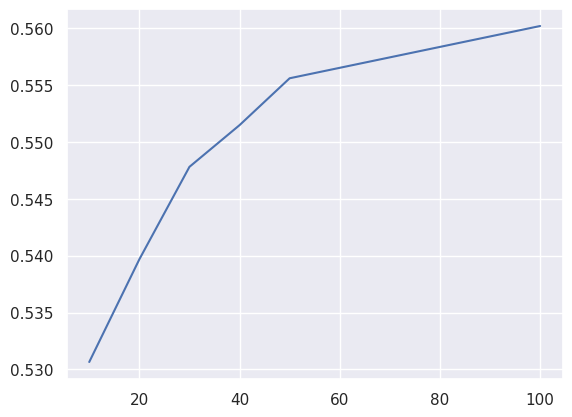

In [67]:
#Plot it
plt.plot(scoresbt['Test Score'])
plt.show()

In [68]:
sortscoresbt=scoresbt.sort_values(by='Test Score',ascending=False)
sortscoresbt

,Train Score,Test Score
100,0.938233,0.560204
50,0.935599,0.555606
40,0.933751,0.551482
30,0.932049,0.547814
20,0.927813,0.539678
10,0.918931,0.530646


In [69]:
#Evalute model for the best estimator.
best_nestimators=sortscoresbt.index[0]
bagregtuned=BaggingRegressor(n_estimators=best_nestimators)
bestbagreg_pipe=make_pipeline(preprocessor,bagregtuned)
bestbagreg_pipe.fit(X_train,y_train)
print('Training scores for Bagging Regressor')
eval_regression(y_train,bestbagreg_pipe.predict(X_train))
print('Testing scores for Bagging Regressor')
eval_regression(y_test,bestbagreg_pipe.predict(X_test))

Training scores for Bagging Regressor
Model Scores
MAE: 295.3112 
MSE: 181,115.7452 
RMSE: 425.5770 
R2: 0.9388

Testing scores for Bagging Regressor
Model Scores
MAE: 767.3214 
MSE: 1,219,027.1669 
RMSE: 1,104.0956 
R2: 0.5582



#Tuned Bagging Regressor


*   This model still is very overfit, even with tuning.



#Overall Recomendations

*   Starchy foods sell the highest amount on average.
*   Supermarket Type3 has the highest sales average of all outlet_types.


#Model Recomendation

*   Overall the best option is a the tuned Forest Regressor Model, Little Bias. Still had some but far less than other models used.



